---
# Este programa simula un colegio y se ingresan notas aleatoriamente para 5 materias  en un periodo
---

### El programa tiene las siguientes líneas generales:
- Se consideran 6 grados, desde 6 hasta 11.
- Se consideran 4 diferentes cursos por cada grado.
- Se consideran 5 materias para todos los grados.

In [304]:
import numpy as np
import matplotlib.pylab as plt
%pylab inline
from datetime import datetime, date, time, timedelta
import calendar
import pandas as pd
from collections import OrderedDict
import statistics 
import matplotlib.mlab as mlab
from dateutil import rrule
import datetime as dt
from array import array
import seaborn as sns
sns.set()
%matplotlib
import csv

Populating the interactive namespace from numpy and matplotlib
Using matplotlib backend: MacOSX


/Users/florez/anaconda3/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['time', 'array', 'plt', 'mat', 'rrule', 'datetime']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


# Clases para manipular la información.
- La clase Estudiante contiene funciones (Métodos) para definir la información de cada individuo en la simulación
- La clase Materias incorpora el método notas, que genera, por medio de una distribución Gaussiana las notas requeridas.
- La clase fechas incluye los días de realización de la evaluación. Se asumen dos examenes por mes

In [159]:
class Estudiante:
    def __init__(I,etiqueta):
        I.etiqueta = etiqueta
            
    def names(self,num_estudiantes):
        self.num_estudiantes=num_estudiantes
        com_names=[]
        names=['Carlos', 'Juan', 'David', 'Andrés', 'Alejandra', 
            'Carolina', 'Lucía', 'Diana', 'Jorge', 'Felipe',
            'Vanessa', 'Mariana', 'James', 'Isaac', 'Pablo',
            'Laura', 'Camilo', 'Sebastian', 'Natalia', 'Federico',
            'Gloria', 'Camila', 'Fernanda', 'Melissa', 'Alexander',
            'Pedro', 'Sebastian', 'Liliana', 'Amalia', 'Santiago']
        lastnames=['Flórez', 'Botero', 'Salinas', 'Goméz', 'Peréz', 
            'Bustamante', 'De la torre', 'Restrepo', 'Acosta', 'Jimenéz',
            'Londoño', 'Estrada', 'Ochoa', 'Cardona', 'Dominguez',
            'Zapata','Fernandez', 'López', 'Guzmán', 'Osorio',
            'Cáceres', 'Arcila', 'Soto', 'Guío', 'Bernal', 
            'Cardenas','García', 'Sanchéz', 'Diaz', 'Torres',
            'Rojas', 'Castro','Ruiz', 'Herrera', 'Quintero',
            'Cardona', 'Berrío', 'Rey', 'Arias', 'Parra', 'Guerrero']
       
        for i in range(num_estudiantes):
            com_names.append(names[np.random.randint(len(names))] +' '+ 
                             lastnames[np.random.randint(len(lastnames))])
        return  com_names    
     
    
    def genero(self): 
        genero = np.zeros((Grado_i * Sub, NE))
        for i in range(0, Grado_i * Sub):
            genero[i] = np.random.randint(0, 2, NE)
        return genero
            
    def edad(self):
        edad = np.zeros((Grado_i * Sub, NE))
        edad[i] = np.random.randint(12, 18, NE)
        return edad

    def grado(self):
        ini = 6 #Colegio de 6 a 11
        d = 0.1 #Asignar el grado sexto uno, sexto 2 etc
        grado  = np.zeros((Grado_i * Sub, NE))
        for i in range(0, Grado_i * Sub):
            if((i + 1) % (Sub) == 0):
                grado[i]  = ini + d
                ini = ini + 1
                d = 0.1
            else :
                grado[i] = ini + d
                d = d + 0.1             
        return grado
      
        
class Materias:
    def __init__(M, materia):
        M.materia=materia
        
    def cursos(self):
        Cur=['Sociales', 'Ciencias', 'Español', 'Matemáticas', 'Inglés']
        return Cur
    
    def nombre_cursos_array(self):
        A=[]
        for i in range(0,5):
            A.append([cursos_cole[i]]*num_estudiantes)
        return A
        
    
    def notas(self, N_notas, mu, sigma):
        self.N_notas=N_notas
        self.mu=mu
        self.sigma=sigma
        
        Grado_i = 6
        Sub     = 4
    
        A = np.zeros((Grado_i * Sub, N_notas, NE))
        
        for j in range(0, N_notas):        #Se realizan 10 notas por cada grado
        
            for i in range(0, Grado_i * Sub): #Recorre el numero de grados 
            
                A[i,j] = np.random.normal(loc = mu, scale = sigma, size = NE)
            # notas i-ésima para 25 estudiantes
    
        A = A.reshape(Grado_i*Sub*NE, N_notas) 
    #Se retorna el numero de notas por grupo asi A[0] son las 10 notas del estudiante 0.
    #Como todo esta ordenado secuencialmente, cada 25 datos se pasa a un grupo
        return A 
    
    def notas_totales(self,notas_curso):
        B=[]
        for k in range(0,20):
            B.append(Var.redondeo(notas_curso[:,k],redondeo))
        return B    
        
    
class Varios:
    def __init__(self,label):
        self.label=label
        
    def fecha_exa(self,year,month,day,num_estudiantes):
        import datetime
        fecha=[]
        Fech=datetime.datetime(year, month, day)
        Fech=Fech.strftime("%x") #Muestra la fecha en el formato mes/día/año
        fecha.append(Fech)
        fecha=fecha*num_estudiantes  
        return fecha
    
    
    def redondeo(self, A, redondeo):
        for i in range(len(A)):
            if A[i]<5.0:
                A[i]=round(A[i],redondeo)
            elif A[i]>=5.0:
                    A[i]=5.0  
        return A
       

## Parametros del colegio

In [160]:
Grado_i  = 6 #El colegio tiene grados desde sexto
Sub  = 4   #hay cuatro sexto por cada grado
NE = 25    #El numero de estudiantes por cada grupo es de 25 
NTE = Grado_i * Sub * NE  #Numero total de estudiantes
#print("El número de estudiantes del colegio es %d"%NTE)
sigma=0.8
mu=3.5
N_notas=20

## Objetos
-Creamos los objetos a partir de las clases definidas.

### Materias

In [163]:
esp=Materias('espanol')
mat=Materias('matematicas')
soc=Materias('sociales')
ing=Materias('ingles')
cie=Materias('ciencias')

### Notas por curso
- Se toman las 20 notas por año de cada estudiante

In [164]:
Notas_esp=esp.notas(N_notas, mu, sigma )
Notas_mat=mat.notas(N_notas, mu, sigma )
Notas_soc=soc.notas(N_notas, mu, sigma )
Notas_ing=ing.notas(N_notas, mu, sigma )
Notas_cie=cie.notas(N_notas, mu, sigma )
#se cambian arreglos de notas para que aparezcan como matrices tal que
#sus filas son el numero de estudiantes del cole y las columnas las notas del año
Notas_esp=Notas_esp.reshape(NE*Sub*Grado_i,N_notas)
Notas_mat=Notas_mat.reshape(NE*Sub*Grado_i,N_notas)
Notas_soc=Notas_soc.reshape(NE*Sub*Grado_i,N_notas)
Notas_ing=Notas_ing.reshape(NE*Sub*Grado_i,N_notas)
Notas_cie=Notas_cie.reshape(NE*Sub*Grado_i,N_notas)

### Manipulación de objetos y métodos para generar los dataframe
- Se generan dataframes para los 600 estudiantes del colegio por materia

In [165]:
#fijo los valores de los parametros que usaré en las llamadas a los métodos
num_estudiantes=NE*Sub*Grado_i
redondeo=1

#defino los objetos Mat, Est y Var
Mat=Materias('')
Est=Estudiante('')
Var=Varios('')

#LLamo los métodos según necesite
cursos_cole=Mat.cursos() # se llama al arreglo que contiene los cursos

grado=Est.grado()
grado=grado.flatten()  # se genera unnarreglo que contiene todos los grados

#creo un arreglo de tamaño num_estudiantes con el nombre de cada curso
nca=Mat.nombre_cursos_array()

nombres=Est.names(num_estudiantes) # formo un arreglo con los nombre de dimension num_estudiantes

#fechas. interval=2 indica cada dos semanas
fecha_examen=Var.fecha_exa(2019,3,15,num_estudiantes) # se fija la fecha según necesidad
fechas_sem=list(rrule.rrule(rrule.WEEKLY,interval=1, dtstart=dt.datetime(2019,2,4), count=20))

# llama a notas_totales y construye un array con todas las notas de cada curso 
notas_esp=Mat.notas_totales(Notas_esp) 
notas_ing=Mat.notas_totales(Notas_ing) 
notas_mat=Mat.notas_totales(Notas_mat) 
notas_soc=Mat.notas_totales(Notas_soc) 
notas_cie=Mat.notas_totales(Notas_cie) 

## **Data Frames**

In [166]:
reporte_esp=OrderedDict([ ('Nombre',nombres),('Grado', grado),('Materia', nca[2]),
                     ('Nota 1', notas_esp[0]),('Fecha 1', fechas_sem[0]),('Nota 2', notas_esp[1]),
                         ('Fecha 2', fechas_sem[1]),
                     ('Nota 3', notas_esp[2]),('Fecha 3', fechas_sem[2]),('Nota 4', notas_esp[3]),
                         ('Fecha 4', fechas_sem[3]),('Nota 5', notas_esp[4]),('Fecha 5', fechas_sem[4]),
                     ('Nota 6', notas_esp[5]),('Fecha 6', fechas_sem[5]),('Nota 7', notas_esp[6]),
                         ('Fecha 7', fechas_sem[6]),('Nota 8', notas_esp[7]),('Fecha 8', fechas_sem[7]),
                     ('Nota 9', notas_esp[8]),('Fecha 9', fechas_sem[8]),('Nota 10', notas_esp[9]),
                         ('Fecha 10', fechas_sem[9]),('Nota 11', notas_esp[10]),('Fecha 11', fechas_sem[10]),
                     ('Nota 12', notas_esp[11]),('Fecha 12', fechas_sem[11]),('Nota 13', notas_esp[12]),
                         ('Fecha 13', fechas_sem[12]),('Nota 14', notas_esp[13]),('Fecha 14', fechas_sem[13]),
                     ('Nota 15', notas_esp[14]),('Fecha 15', fechas_sem[14]),('Nota 16', notas_esp[15]),
                         ('Fecha 16', fechas_sem[15]),('Nota 17', notas_esp[16]),('Fecha 17', fechas_sem[16]),
                     ('Nota 18', notas_esp[17]),('Fecha 18', fechas_sem[17]),('Nota 19', notas_esp[18]),('Fecha 19', fechas_sem[18]),
                         ('Nota 20', notas_esp[19]),
                      ('Fecha 20', fechas_sem[19]),
                    ])
df_esp = pd.DataFrame.from_dict(reporte_esp)
df_esp.head()
#df_esp.info()

# Eliminamos los espacios de las etiquetas de las columnas para su manipulación
df_esp.columns = ['Nombre','Grado','Materia','Nota_1','Fecha_1','Nota_2','Fecha_2','Nota_3','Fecha_3','Nota_4','Fecha_4','Nota_5','Fecha_5',
             'Nota_6','Fecha_6','Nota_7','Fecha_7','Nota_8','Fecha_8','Nota_9','Fecha_9','Nota_10','Fecha_10','Nota_11','Fecha_11',
             'Nota_12','Fecha_12','Nota_13','Fecha_13','Nota_14','Fecha_14','Nota_15','Fecha_15','Nota_16','Fecha_16',
                 'Nota_17','Fecha_17','Nota_18','Fecha_18','Nota_19','Fecha_19','Nota_20','Fecha_20']
df_esp.head()

,Nombre,Grado,Materia,Nota_1,Fecha_1,Nota_2,Fecha_2,Nota_3,Fecha_3,Nota_4,...,Nota_16,Fecha_16,Nota_17,Fecha_17,Nota_18,Fecha_18,Nota_19,Fecha_19,Nota_20,Fecha_20
0,Vanessa Cardenas,6.1,Español,4.9,2019-02-04,2.6,2019-02-11,3.6,2019-02-18,3.5,...,3.6,2019-05-20,2.7,2019-05-27,2.9,2019-06-03,3.9,2019-06-10,3.3,2019-06-17
1,Pablo De la torre,6.1,Español,3.3,2019-02-04,2.5,2019-02-11,3.4,2019-02-18,5.0,...,3.5,2019-05-20,3.1,2019-05-27,2.0,2019-06-03,3.1,2019-06-10,3.9,2019-06-17
2,Isaac Berrío,6.1,Español,2.1,2019-02-04,2.4,2019-02-11,2.9,2019-02-18,2.9,...,4.0,2019-05-20,3.2,2019-05-27,2.5,2019-06-03,4.1,2019-06-10,4.0,2019-06-17
3,Carlos Guzmán,6.1,Español,3.7,2019-02-04,4.0,2019-02-11,3.3,2019-02-18,3.7,...,3.8,2019-05-20,4.9,2019-05-27,2.1,2019-06-03,2.8,2019-06-10,3.1,2019-06-17
4,Pedro Arias,6.1,Español,4.1,2019-02-04,4.9,2019-02-11,1.7,2019-02-18,3.7,...,3.2,2019-05-20,3.5,2019-05-27,4.4,2019-06-03,1.6,2019-06-10,2.4,2019-06-17


In [167]:
reporte_mat=OrderedDict([ ('Nombre',nombres),('Grado', grado),('Materia', nca[3]),
                     ('Nota 1', notas_mat[0]),('Nota 2', notas_mat[1]),
                     ('Nota 3', notas_mat[2]),('Nota 4', notas_mat[3]),('Nota 5', notas_mat[4]),
                     ('Nota 6', notas_mat[5]),('Nota 7', notas_mat[6]),('Nota 8', notas_mat[7]),
                     ('Nota 9', notas_mat[8]),('Nota 10', notas_mat[9]),('Nota 11', notas_mat[10]),
                     ('Nota 12', notas_mat[11]),('Nota 13', notas_mat[12]),('Nota 14', notas_mat[13]),
                     ('Nota 15', notas_mat[14]),('Nota 16', notas_mat[15]),('Nota 17', notas_mat[16]),
                     ('Nota 18', notas_mat[17]),('Nota 19', notas_mat[18]),('Nota 20', notas_mat[19]),
                    ])
df_mat = pd.DataFrame.from_dict(reporte_mat)
df_mat.head()

,Nombre,Grado,Materia,Nota 1,Nota 2,Nota 3,Nota 4,Nota 5,Nota 6,Nota 7,...,Nota 11,Nota 12,Nota 13,Nota 14,Nota 15,Nota 16,Nota 17,Nota 18,Nota 19,Nota 20
0,Vanessa Cardenas,6.1,Matemáticas,4.4,5.0,3.0,2.7,3.0,3.8,4.5,...,5.0,3.6,5.0,3.3,2.5,3.6,3.3,3.3,3.4,3.6
1,Pablo De la torre,6.1,Matemáticas,3.5,4.4,3.9,3.4,4.8,2.3,3.2,...,2.8,3.3,3.6,2.5,3.4,4.0,3.3,3.2,4.2,5.0
2,Isaac Berrío,6.1,Matemáticas,3.6,4.6,3.6,2.8,2.4,3.5,4.5,...,1.4,4.0,2.8,3.4,3.6,4.1,4.1,4.7,2.2,3.1
3,Carlos Guzmán,6.1,Matemáticas,2.9,3.7,3.8,3.7,4.2,2.8,3.5,...,2.4,4.1,2.7,3.7,3.5,4.5,3.9,2.3,4.0,4.6
4,Pedro Arias,6.1,Matemáticas,4.0,5.0,2.6,4.1,4.1,3.6,3.1,...,1.9,4.5,3.6,3.3,3.3,3.4,3.7,3.4,3.4,2.7


In [168]:
reporte_fis=OrderedDict([ ('Nombre',nombres),('Grado', grado),('Materia', nca[0]),
                     ('Nota 1', notas_fis[0]),('Nota 2', notas_fis[1]),
                     ('Nota 3', notas_fis[2]),('Nota 4', notas_fis[3]),('Nota 5', notas_fis[4]),
                     ('Nota 6', notas_fis[5]),('Nota 7', notas_fis[6]),('Nota 8', notas_fis[7]),
                     ('Nota 9', notas_fis[8]),('Nota 10', notas_fis[9]),('Nota 11', notas_fis[10]),
                     ('Nota 12', notas_fis[11]),('Nota 13', notas_fis[12]),('Nota 14', notas_fis[13]),
                     ('Nota 15', notas_fis[14]),('Nota 16', notas_fis[15]),('Nota 17', notas_fis[16]),
                     ('Nota 18', notas_fis[17]),('Nota 19', notas_fis[18]),('Nota 20', notas_fis[19]),
                    ])
df_fis = pd.DataFrame.from_dict(reporte_fis)
df_fis.head()

,Nombre,Grado,Materia,Nota 1,Nota 2,Nota 3,Nota 4,Nota 5,Nota 6,Nota 7,...,Nota 11,Nota 12,Nota 13,Nota 14,Nota 15,Nota 16,Nota 17,Nota 18,Nota 19,Nota 20
0,Vanessa Cardenas,6.1,Sociales,4.2,3.3,3.9,4.7,2.9,2.1,3.2,...,3.5,4.0,2.5,4.2,5.0,2.6,3.9,4.4,3.3,5.0
1,Pablo De la torre,6.1,Sociales,2.9,4.0,1.7,3.8,3.7,4.2,3.4,...,2.9,3.9,3.2,3.9,2.0,5.0,2.9,2.8,2.9,2.8
2,Isaac Berrío,6.1,Sociales,3.9,4.5,4.1,3.8,1.5,2.5,3.0,...,3.1,3.3,2.0,3.8,4.1,3.3,3.6,3.8,3.4,5.0
3,Carlos Guzmán,6.1,Sociales,4.2,3.0,3.9,2.6,5.0,3.4,2.2,...,4.0,3.3,2.9,4.1,3.2,4.7,4.1,3.9,4.7,3.9
4,Pedro Arias,6.1,Sociales,4.2,2.3,3.2,3.6,2.6,2.3,3.4,...,4.6,2.4,3.1,3.2,2.8,4.3,3.6,3.5,3.4,2.8


---
# Data frame  organizado por fechas y estudiantes
---

In [170]:
#genero el arreglo para las fechas y un lista para las notas de cada uno almacenado en nota_ts
fecha_ts=[]
nota_ts_all=[]
for i in range(2,22):
        k=2*i
        fecha_ts.append(df_esp.iloc[0, k])
for j in range(0,len(nombres)):
    for i in range(2,22):
        l=2*i-1
        nota_ts_all.append(df_esp.iloc[j, l])
#transformo la lista en un array para hacerle reshape a las dimensiones (20,600)      
nota_ts_all=np.asarray(nota_ts_all)
nota_ts_all=nota_ts_all.reshape(NE*Sub*Grado_i,N_notas)
#nota_ts_all[i] me dará las 20 notas del estudiante i-esimo en español

labels= []
rows=[]
for i in range(0,len(nombres)):
    labels.append(nombres[i])
labels.insert(0,'Fecha')  

for i in range(0,N_notas):
    for j in range(0,len(nombres)):
        rows.append(notas_esp[i][j])

In [171]:
for j in range(0,N_notas):
    k=j*601
    rows.insert(k,fecha_ts[j])

In [172]:
rows=np.asarray(rows)
rows=rows.reshape(N_notas,NE*Sub*Grado_i+1)

In [173]:
df_beta = pd.DataFrame.from_records(rows, columns=labels)

In [174]:
df_beta

,Fecha,Vanessa Cardenas,Pablo De la torre,Isaac Berrío,Carlos Guzmán,Pedro Arias,Mariana Dominguez,James Flórez,Melissa Rey,Carolina Londoño,...,Sebastian De la torre,Vanessa Parra,Santiago García,Alejandra Cardenas,Camilo Restrepo,Sebastian Salinas,Liliana Quintero,Camila Cáceres,David Soto,Sebastian López
0,2019-02-04,4.9,3.3,2.1,3.7,4.1,3.8,3.6,4.1,2.9,...,3.4,4.0,3.5,5.0,3.9,2.5,3.4,1.9,3.2,3.7
1,2019-02-11,2.6,2.5,2.4,4.0,4.9,3.3,3.0,2.3,3.1,...,2.7,3.9,3.1,3.5,2.4,3.9,2.2,3.0,3.8,4.5
2,2019-02-18,3.6,3.4,2.9,3.3,1.7,4.8,3.7,2.4,3.5,...,3.9,3.9,4.6,4.7,3.8,3.4,1.7,3.3,4.1,4.1
3,2019-02-25,3.5,5.0,2.9,3.7,3.7,2.7,3.1,3.7,2.2,...,4.2,3.5,4.5,3.8,3.3,3.4,3.7,3.8,2.9,3.2
4,2019-03-04,2.7,3.8,3.5,2.8,4.3,2.5,3.7,2.2,4.0,...,4.4,3.3,4.7,3.3,3.2,3.9,3.4,3.7,3.1,3.7
5,2019-03-11,4.5,3.6,3.8,4.8,3.9,3.0,3.6,3.8,3.9,...,2.8,3.0,4.2,3.0,3.9,4.2,2.9,4.8,2.2,4.7
6,2019-03-18,3.8,2.5,4.6,3.4,2.9,3.3,4.8,2.9,2.7,...,2.5,3.1,3.0,4.6,3.7,4.2,3.9,3.3,3.2,3.4
7,2019-03-25,2.6,3.8,5.0,3.6,4.6,4.6,3.2,3.2,3.3,...,3.8,3.3,2.7,2.8,2.6,4.3,4.0,3.5,3.9,3.3
8,2019-04-01,3.1,3.7,3.6,4.2,3.4,4.7,4.4,4.8,2.7,...,1.2,2.7,2.7,4.0,2.9,5.0,4.2,4.0,2.5,3.1
9,2019-04-08,3.9,4.4,4.5,4.1,2.5,3.4,2.7,2.2,2.9,...,3.9,2.7,2.4,4.3,2.8,2.5,2.6,4.6,3.6,3.4


---
# Data frame  organizado por eventos
- 5 columnas con información de fecha, nombre, curso, materia, nota

In [300]:
notas_cinco_cursos=[]
for k in range(0,len(cursos_cole)):
        notas_cinco_cursos.append(notas_soc)
        notas_cinco_cursos.append(notas_cie)
        notas_cinco_cursos.append(notas_esp)
        notas_cinco_cursos.append(notas_mat)
        notas_cinco_cursos.append(notas_ing)

In [301]:
labels_1= ['Nombre','Curso', 'Materia', 'Nota','Fecha']
rows_a=[]   
for k in range(0,len(cursos_cole)):
    for i in range(0,N_notas):
        for j in range(0,len(nombres)):
            rows_a.append(nombres[j])
            rows_a.append(grado[j])
            rows_a.append(cursos_cole[k])
            rows_a.append(notas_cinco_cursos[k][i][j])
            rows_a.append(fecha_ts[i])
rows_a=np.asarray(rows_a) 
rows_a=rows_a.reshape(len(cursos_cole)*N_notas*NE*Sub*Grado_i,len(labels_1))

In [313]:
df_bot = pd.DataFrame.from_records(rows_a, columns=labels_1)
df_bot.head()

,Nombre,Curso,Materia,Nota,Fecha
0,Vanessa Cardenas,6.1,Sociales,3.2,2019-02-04
1,Pablo De la torre,6.1,Sociales,3.9,2019-02-04
2,Isaac Berrío,6.1,Sociales,2.7,2019-02-04
3,Carlos Guzmán,6.1,Sociales,3.4,2019-02-04
4,Pedro Arias,6.1,Sociales,3.1,2019-02-04


In [318]:
df_bot.to_csv("df_eventos.csv", index=False)

---
## **Gráficas**
---

## Pie Chart

- Se calcula el número de estudiantes que ganan y pierden en el grado 6. Se gana con nota mayor que 3.0

In [16]:
loss=0
win=0
Col_nota_1=df_esp['Nota_1']
for l in range(len(notas_esp[0][0:100])):
    if Col_nota_1[l]<3.0:
        loss=loss+1
    else:
        win=win+1

### Pie chart para los sextos en el curso de español, primer examen

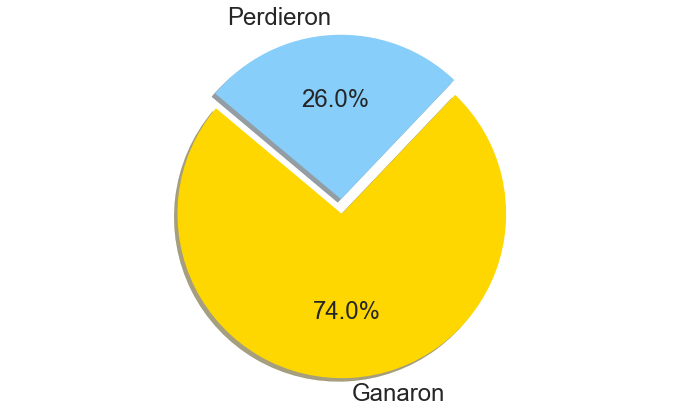

In [17]:
labels = 'Ganaron', 'Perdieron', 
sizes = [win, loss]
colors = ['gold','lightskyblue' ]
explode = (0.09, 0)  # explode 1st slice
# Plot
plt.figure(figsize(12,7))
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140,textprops={'fontsize': 24})
plt.axis('equal')
plt.savefig('examen_1_español_4_sextos.png')
savefig('examen_1_español_4_sextos.png', bbox_inches='tight')
plt.show()

### Pie chart para todos los grados en el curso de español 

In [18]:
loss=0
win=0
Col_nota_1=df_esp['Nota_1']
for l in range(len(notas_esp[0])):
    if Col_nota_1[l]<3.0:
        loss=loss+1
    else:
        win=win+1        

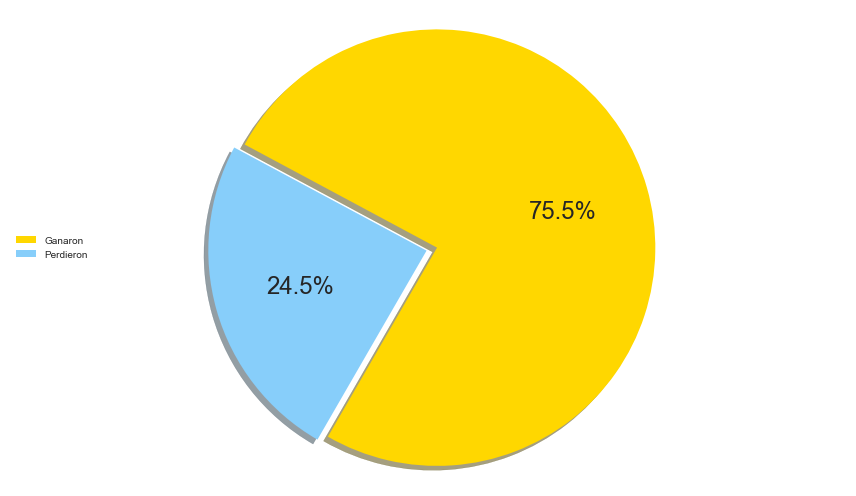

In [19]:
labels = 'Ganaron', 'Perdieron', 
sizes = [win, loss]
colors = ['gold','lightskyblue' ]
explode = (0.05, 0)  # explode 1st slice
# Plot
plt.figure(figsize(12,7))
plt.pie(sizes, explode=explode, #labels=labels,
colors=colors,autopct='%1.1f%%', shadow=True, startangle=240,textprops={'fontsize': 24})
plt.legend(labels, loc=6, bbox_to_anchor=(0, 0, 0.5, 1))
plt.tight_layout()
plt.axis('equal')
plt.savefig('examen_1_español_todoelcole.png')
savefig('examen_1_español_todoelcole.png', bbox_inches='tight')
plt.show()

### Pastel como un círculo para todos los cursos en Español. Examen 1 

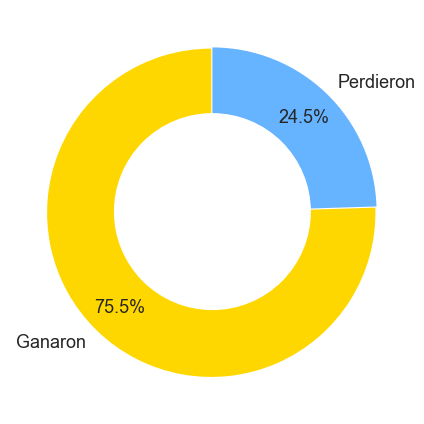

In [20]:
labels = ['Ganaron', 'Perdieron']
sizes = [win, loss]

#colors
colors = ['gold','#66b3ff']

#explsion
explode = (0.01, 0)
 
plt.figure(figsize(6,6))    
plt.pie(sizes, colors = colors, labels=labels, autopct='%1.1f%%', startangle=90, 
        pctdistance=0.80, explode = explode,textprops={'fontsize': 18})
#draw circle
centre_circle = plt.Circle((0,0),0.60,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Equal aspect ratio ensures that pie is drawn as a circle
#ax.axis('equal')  
plt.tight_layout()
plt.savefig('examen_1_español_4_sextos_version_2.png')
savefig('examen_1_español_4_sextos_version_2.png', bbox_inches='tight')
plt.show()

### múltiple gráfica
- Como ejemplo se toman 8 de las 20 notas del semestre en Español

In [21]:
df_esp_notas=df_esp.loc[:, ['Nota_1', 'Nota_2','Nota_3','Nota_4','Nota_5','Nota_6',
                           'Nota_7','Nota_8']]
df_esp_notas.head()

,Nota_1,Nota_2,Nota_3,Nota_4,Nota_5,Nota_6,Nota_7,Nota_8
0,3.5,3.5,2.6,4.3,3.9,4.3,4.3,3.8
1,4.1,4.9,3.8,4.1,3.7,3.7,2.9,3.1
2,3.0,2.3,3.6,4.6,4.4,4.1,3.9,3.5
3,3.4,2.8,4.0,3.7,2.0,5.0,3.3,4.0
4,3.3,3.0,3.6,3.9,3.1,4.8,3.0,1.7


In [22]:
# defino 3 arreglos vacios para almacenar las notas de las 4 columnas de arriba y los numeros
# de ganadores y perdedores
Col_notas_todas=[]
Loss=[]
Win=[]
# agrego a las 4 entradas del arreglo Col_notas_todas los 4 arrays de notas del df df_esp_notas
for j in range(0,len(df_esp_notas.columns)):
    Col_notas_todas.append(df_esp_notas.iloc[0:100,j])

# aquí quiero contar ganadores y perdedores en elos 4 examenes para los sextos en español    
for k in range(0,len(Col_notas_todas)):
    l=0
    w=0
    for r in range(0,len(notas_esp[0][0:100])):
        if Col_notas_todas[k][r]<3.0:
            l=l+1
        else:
            w=w+1  
    Loss.append(l)
    Win.append(w)

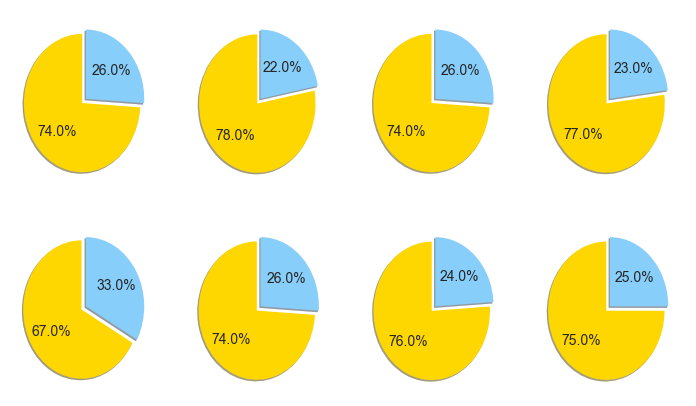

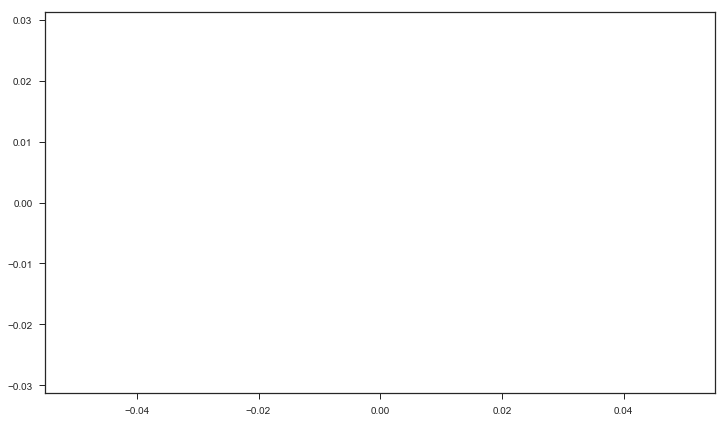

In [67]:
fig,axes= plt.subplots(2, 4)
labels = 'Ganaron', 'Perdieron' 
colors = ['gold','lightskyblue']
plt.figure(figsize(12,7))
explode = (0.09, 0)  # explode 1st slice
for i, az in enumerate(axes.flatten()):
    sizes = [Win[i], Loss[i]]
    az.pie(sizes, explode=explode, #labels=labels, 
           colors=colors,autopct='%1.1f%%', shadow=True, startangle=90,textprops={'fontsize': 14})
    plt.axis('equal')
plt.savefig('examenes_1_al_8_español_4_sextos.png')
savefig('examenes_1_al_8_español_4_sextos.png', bbox_inches='tight')
plt.show()

## Histograma

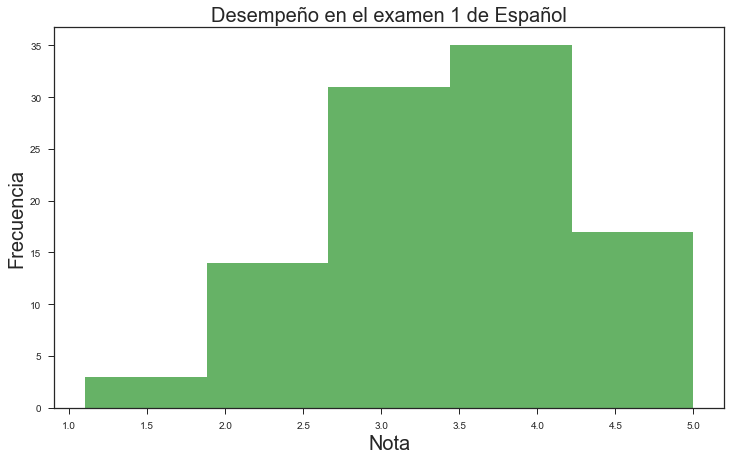

In [68]:
import seaborn
x = Col_notas_todas[0]
plt.xlabel('Nota',fontsize=20)
plt.ylabel('Frecuencia',fontsize=20)
plt.title(r'Desempeño en el examen 1 de Español',fontsize=20)
seaborn.set_style('ticks')
num_bins = 5
n, bins, patches = plt.hist(x, num_bins, facecolor='green', alpha=0.6);
plt.figure(figsize(12,7))
plt.show()
plt.savefig('histograma_todoelcole_espanol_examen_1.jpeg')
savefig('histograma_todoelcole_espanol_examen_1.jpeg', bbox_inches='tight')

## Series de tiempo
---
* Extraemos info

In [25]:
df_extracto_1=df_esp.loc[[0], ['Nota_1', 'Nota_2', 'Nota_3', 'Nota_4','Nota_5',
             'Nota_6','Nota_7','Nota_8','Nota_9','Nota_10','Nota_11',
             'Nota_12','Nota_13','Nota_14','Nota_15','Nota_16',
                 'Nota_17','Nota_18','Nota_19','Nota_20']]
df_extracto_2=df_esp.loc[[1], ['Fecha_1', 'Fecha_2', 'Fecha_3', 'Fecha_4','Fecha_5',
             'Fecha_6','Fecha_7','Fecha_8','Fecha_9','Fecha_10','Fecha_11',
             'Fecha_12','Fecha_13','Fecha_14','Fecha_15','Fecha_16',
                 'Fecha_17','Fecha_18','Fecha_19','Fecha_20']]

In [26]:
df_extracto_1

,Nota_1,Nota_2,Nota_3,Nota_4,Nota_5,Nota_6,Nota_7,Nota_8,Nota_9,Nota_10,Nota_11,Nota_12,Nota_13,Nota_14,Nota_15,Nota_16,Nota_17,Nota_18,Nota_19,Nota_20
0,3.5,3.5,2.6,4.3,3.9,4.3,4.3,3.8,3.0,4.0,3.1,2.1,2.7,2.5,3.6,4.9,4.1,1.9,3.9,3.1


## Serie de tiempo para un estudiante

In [27]:
Nom_est=df_esp.iloc[0, 0]
fecha_ts=[]
nota_ts=[]
for i in range(2,22):
    k=2*i
    l=2*i-1
    fecha_ts.append(df_esp.iloc[0, k])
    nota_ts.append(df_esp.iloc[0, l])

In [28]:
ts_1=OrderedDict([('Fecha',fecha_ts),('Nota', nota_ts)])
df_ts_1 = pd.DataFrame.from_dict(ts_1)
df_ts_1.head() 

,Fecha,Nota
0,2019-02-04,3.5
1,2019-02-11,3.5
2,2019-02-18,2.6
3,2019-02-25,4.3
4,2019-03-04,3.9


**Cambiamos el formato de las fechas a dato tipo datetime  para graficar**

In [29]:
df_ts_1.Fecha = pd.to_datetime(df_ts_1.Fecha)
df_ts_1.set_index('Fecha', inplace=True)

In [30]:
df_ts_1.head()

,Nota
Fecha,
2019-02-04,3.5
2019-02-11,3.5
2019-02-18,2.6
2019-02-25,4.3
2019-03-04,3.9


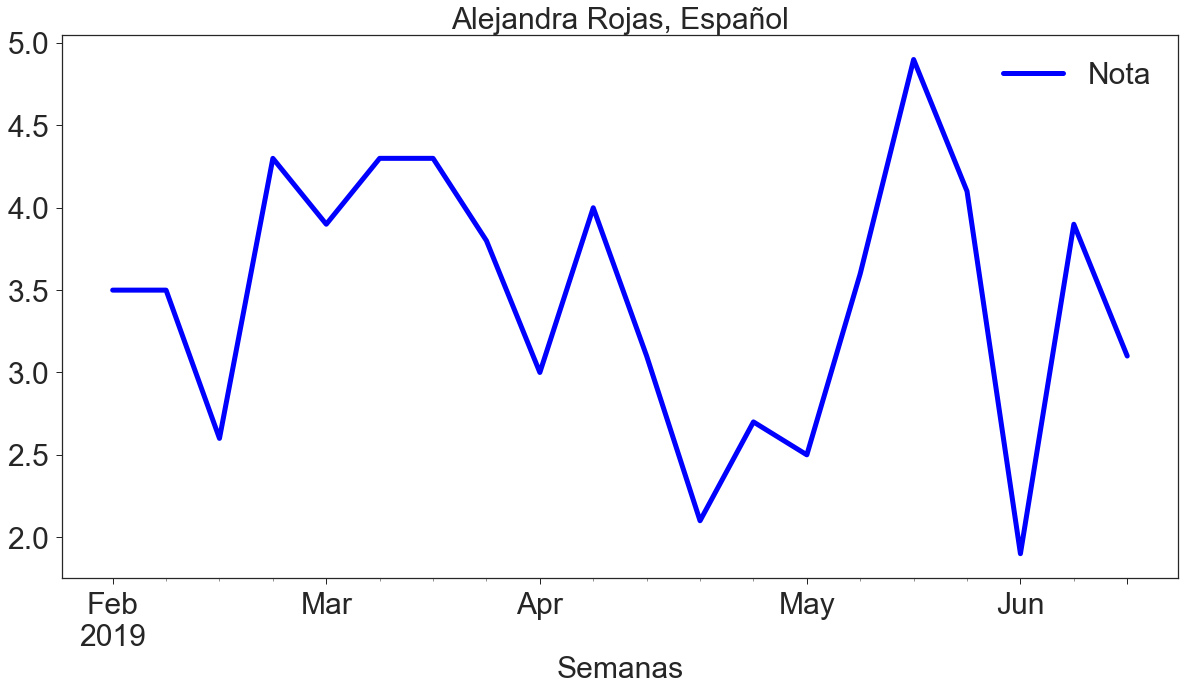

In [31]:
fig=df_ts_1.plot(figsize=(20,10), linewidth=5, fontsize=30,color="b")
fig.set_facecolor('white')
plt.title(Nom_est+', Español', fontsize=30)
plt.xlabel('Semanas', fontsize=30);
seaborn.set_style('ticks')
fig.legend(['Nota'],fontsize=30);
#plt.ylabel('Nota', fontsize=50);

## Serie de tiempo para un grupo promediando cada examen

**Sacamos la media de las notas de español para el grupo 6.1**

In [32]:
mean_sexto1=[]
for i in range(0,20):
    mean_sexto1.append(round(statistics.mean(notas_esp[i][0:100]),1))

In [33]:
ts_sexto1=OrderedDict([('Fecha',fecha_ts),('Nota', mean_sexto1)])
df_sexto1 = pd.DataFrame.from_dict(ts_sexto1)
df_sexto1.head() 

,Fecha,Nota
0,2019-02-04,3.5
1,2019-02-11,3.5
2,2019-02-18,3.5
3,2019-02-25,3.5
4,2019-03-04,3.4


In [34]:
df_sexto1.Fecha = pd.to_datetime(df_sexto1.Fecha)
df_sexto1.set_index('Fecha', inplace=True)

In [35]:
df_sexto1.head()

,Nota
Fecha,
2019-02-04,3.5
2019-02-11,3.5
2019-02-18,3.5
2019-02-25,3.5
2019-03-04,3.4


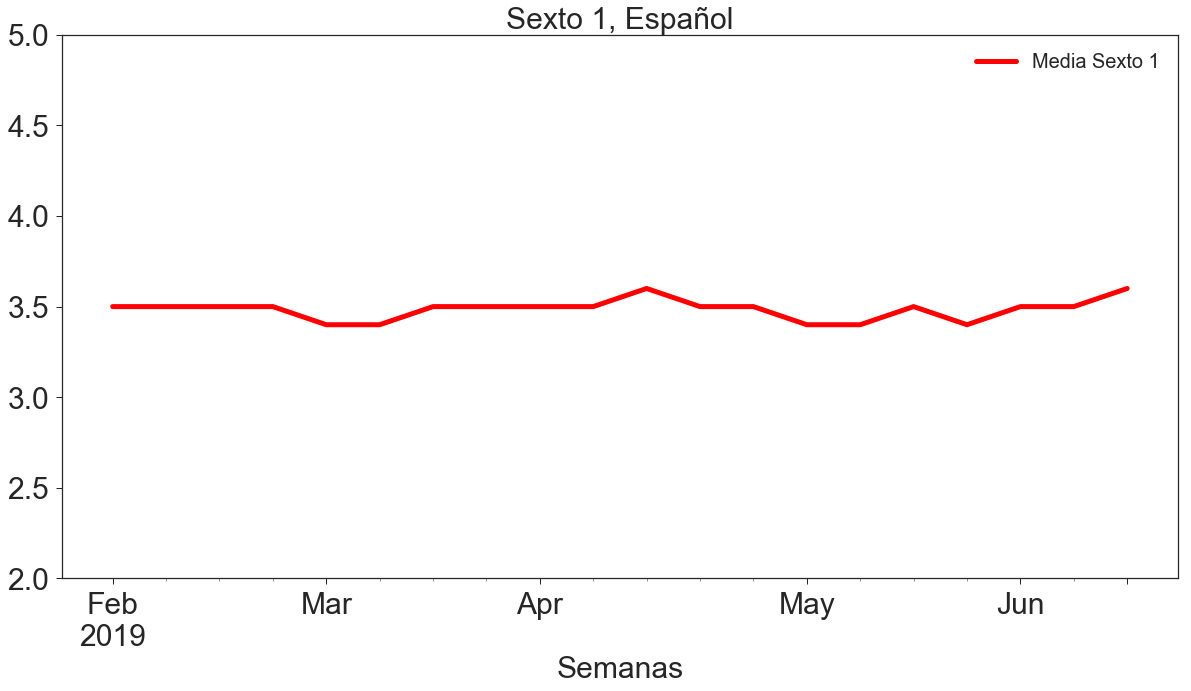

In [36]:
fig=df_sexto1.plot(figsize=(20,10), linewidth=5, fontsize=30,color="r")
plt.title('Sexto 1'+', Español', fontsize=30)
plt.xlabel('Semanas', fontsize=30);
#plt.ylabel('Nota', fontsize=50);
seaborn.set_style('ticks')
axes = plt.gca()
axes.set_ylim([2,5.0])
fig.legend(['Media Sexto 1'],fontsize=20);

### media del grupo vs estudiante

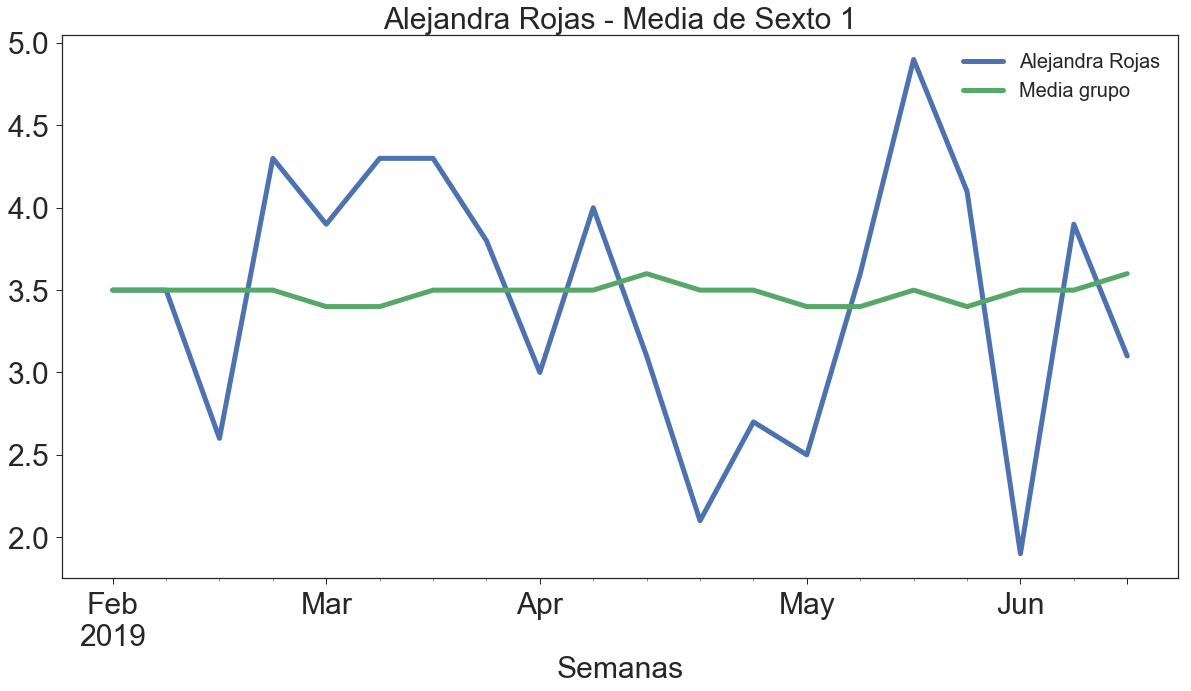

In [37]:
import seaborn
ax= df_ts_1.plot(figsize=(20,10), linewidth=5, fontsize=30)
fig= df_sexto1.plot(figsize=(20,10), linewidth=5, fontsize=30,ax=ax);
fig.set_facecolor('white')
seaborn.set_style('ticks')
plt.title(Nom_est+' '+'- Media de Sexto 1', fontsize=30)
plt.xlabel('Semanas', fontsize=30);
ax.legend([Nom_est,'Media grupo'],fontsize=20);

## Serie de tiempo para un grado (sexto)

In [38]:
df_esp.head()

,Nombre,Grado,Materia,Nota_1,Fecha_1,Nota_2,Fecha_2,Nota_3,Fecha_3,Nota_4,...,Nota_16,Fecha_16,Nota_17,Fecha_17,Nota_18,Fecha_18,Nota_19,Fecha_19,Nota_20,Fecha_20
0,Alejandra Rojas,6.1,Español,3.5,2019-02-04,3.5,2019-02-11,2.6,2019-02-18,4.3,...,4.9,2019-05-20,4.1,2019-05-27,1.9,2019-06-03,3.9,2019-06-10,3.1,2019-06-17
1,Pedro Cáceres,6.1,Español,4.1,2019-02-04,4.9,2019-02-11,3.8,2019-02-18,4.1,...,3.4,2019-05-20,3.3,2019-05-27,2.8,2019-06-03,3.2,2019-06-10,4.9,2019-06-17
2,Alejandra De la torre,6.1,Español,3.0,2019-02-04,2.3,2019-02-11,3.6,2019-02-18,4.6,...,4.2,2019-05-20,4.3,2019-05-27,4.0,2019-06-03,3.8,2019-06-10,4.1,2019-06-17
3,Vanessa Zapata,6.1,Español,3.4,2019-02-04,2.8,2019-02-11,4.0,2019-02-18,3.7,...,2.7,2019-05-20,2.3,2019-05-27,2.6,2019-06-03,2.6,2019-06-10,2.7,2019-06-17
4,James Acosta,6.1,Español,3.3,2019-02-04,3.0,2019-02-11,3.6,2019-02-18,3.9,...,3.2,2019-05-20,4.2,2019-05-27,2.5,2019-06-03,5.0,2019-06-10,3.9,2019-06-17


In [39]:
mean_sexto=[]
for i in range(0,20):
    mean_sexto.append(round(statistics.mean(notas_esp[i]),1))

In [40]:
ts_sexto=OrderedDict([('Fecha',fecha_ts),('Nota', mean_sexto)])
df_sexto = pd.DataFrame.from_dict(ts_sexto)
df_sexto.head() 

,Fecha,Nota
0,2019-02-04,3.5
1,2019-02-11,3.5
2,2019-02-18,3.5
3,2019-02-25,3.5
4,2019-03-04,3.5


In [41]:
df_sexto.Fecha = pd.to_datetime(df_sexto.Fecha)
df_sexto.set_index('Fecha', inplace=True)

In [42]:
df_sexto.head()

,Nota
Fecha,
2019-02-04,3.5
2019-02-11,3.5
2019-02-18,3.5
2019-02-25,3.5
2019-03-04,3.5


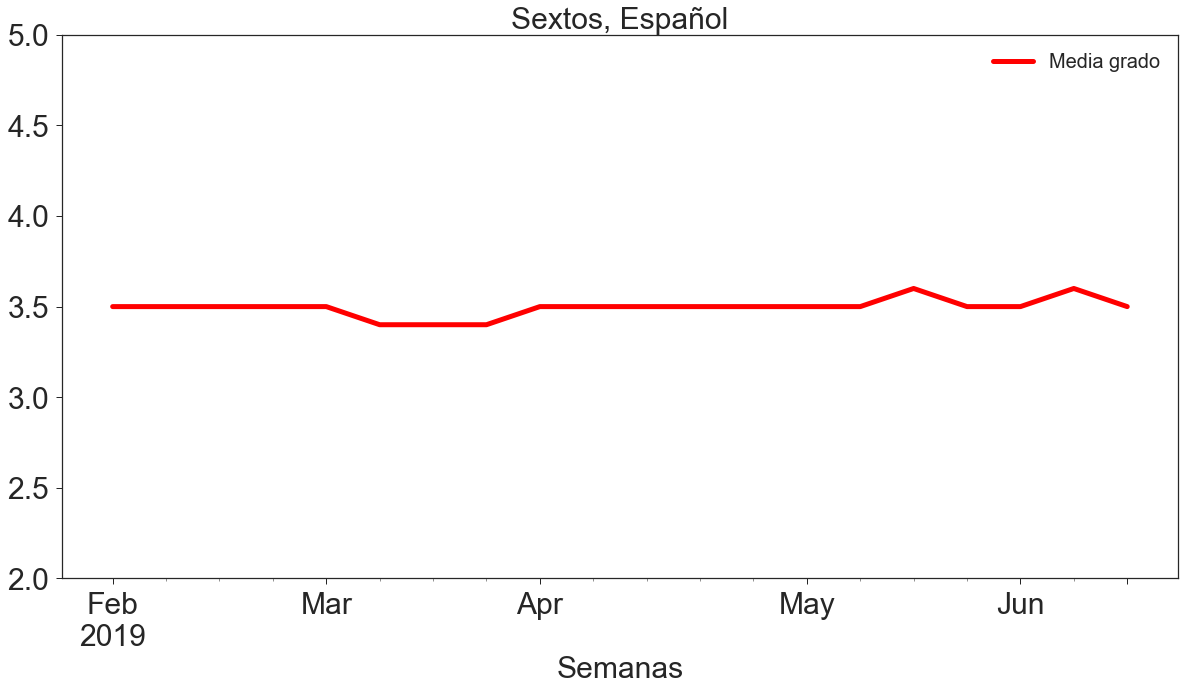

In [43]:
import seaborn
fig=df_sexto.plot(figsize=(20,10), linewidth=5, fontsize=30,color="r")
plt.title('Sextos'+', Español', fontsize=30)
plt.xlabel('Semanas', fontsize=30);
#plt.ylabel('Nota', fontsize=50);
seaborn.set_style('ticks')
axes = plt.gca()
axes.set_ylim([2,5.0])
fig.legend(['Media grado'],fontsize=20);

### media del grado vs estudiante

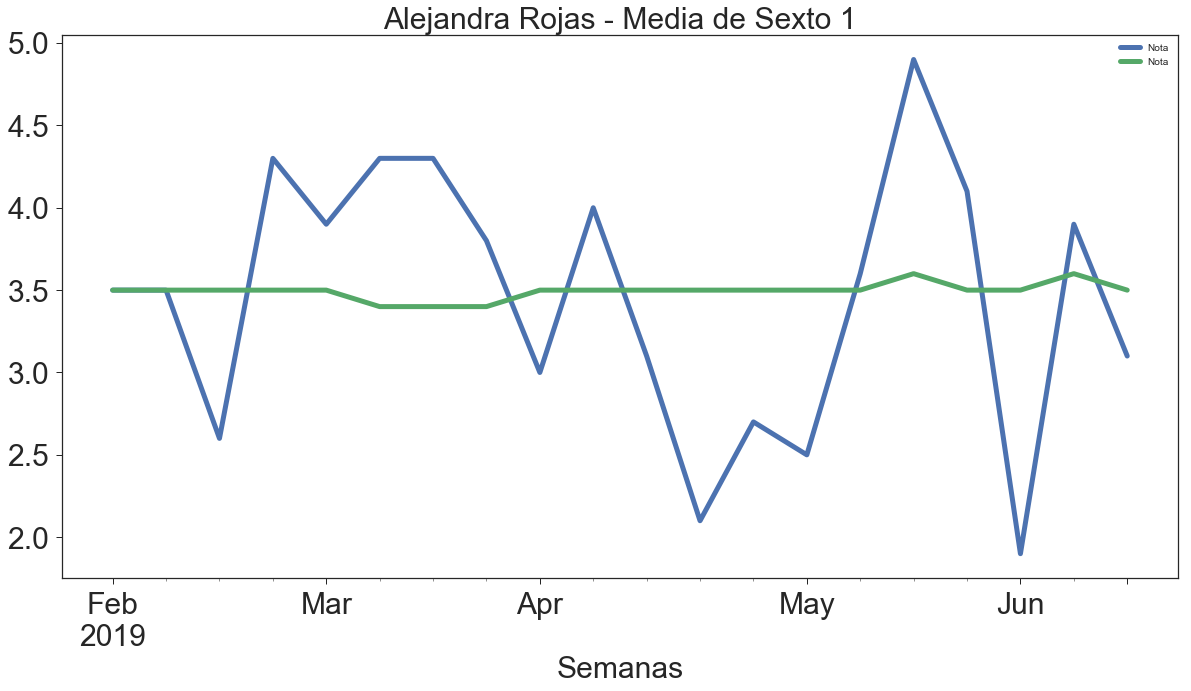

In [44]:
ax = df_ts_1.plot(figsize=(20,10), linewidth=5, fontsize=30)
df_sexto.plot(figsize=(20,10), linewidth=5, fontsize=30,ax=ax);
seaborn.set_style('ticks')
plt.title(Nom_est+' '+'- Media de Sexto 1', fontsize=30)
plt.xlabel('Semanas', fontsize=30);

## media del grado, media del grupo,  estudiante

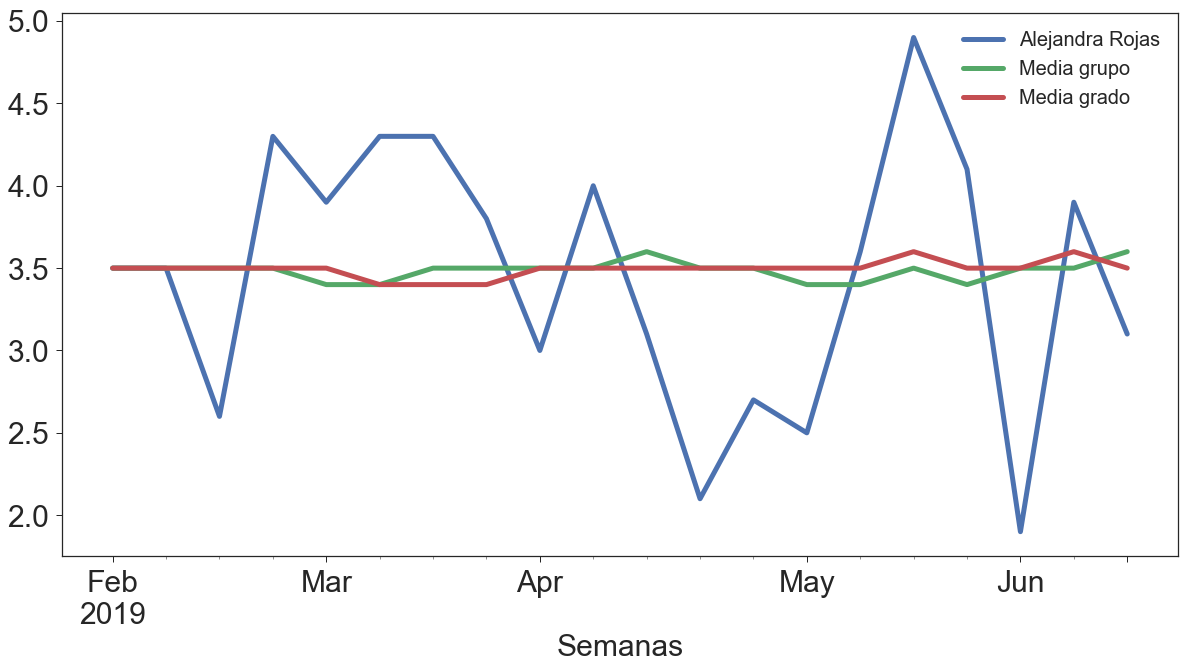

In [45]:
ax = df_ts_1.plot(figsize=(20,10), linewidth=5, fontsize=30)
fig1=df_sexto1.plot(figsize=(20,10), linewidth=5, fontsize=30,ax=ax);
fig2=df_sexto.plot(figsize=(20,10), linewidth=5, fontsize=30,ax=ax);
plt.xlabel('Semanas', fontsize=30);
seaborn.set_style('ticks')
ax.legend([Nom_est,'Media grupo','Media grado'],fontsize=20);
plt.savefig('serie_de_tiempo_1.png')
savefig('serie_de_tiempo_1.png', bbox_inches='tight')

# Serie tiempo de cualquier estudiante (de todos) 

In [46]:
#genero el arreglo para las fechas y un lista para las notas de cada uno almacenado en nota_ts
fecha_ts=[]
nota_ts_all=[]
for i in range(2,22):
        k=2*i
        fecha_ts.append(df_esp.iloc[0, k])
for j in range(0,len(nombres)):
    for i in range(2,22):
        l=2*i-1
        nota_ts_all.append(df_esp.iloc[j, l])
#transformo la lista en un array para hacerle reshape a las dimensiones (20,600)      
nota_ts_all=np.asarray(nota_ts_all)
nota_ts_all=nota_ts_all.reshape(NE*Sub*Grado_i,N_notas)
#nota_ts_all[i] me dará las 20 notas del estudiante i-esimo en español

In [47]:
ts_all=OrderedDict([('Fecha',fecha_ts),('Nota', nota_ts_all[4])])
df_ts_all = pd.DataFrame.from_dict(ts_all)
df_ts_all.head();

In [48]:
ts_All=[]
df_ts_All=[]
for h in range(0,len(nombres)):
    ts_All.append(OrderedDict([('Fecha',fecha_ts),('Nota', nota_ts_all[h])]))
    df_ts_All.append(pd.DataFrame.from_dict(ts_All[h]))

**Cambiamos el formato de las fechas a dato tipo datetime  para graficar**

In [49]:
for h in range(0,len(nombres)):
    df_ts_All[h].Fecha = pd.to_datetime(df_ts_All[h].Fecha)
    df_ts_All[h].set_index('Fecha', inplace=True)

## Gráfica de cualquier estudiante (entre 0 y 600)
- Se remplaza h por cualquier valor entre 0 y 600. Por el momento no hay un criterio de búsqueda
de un estudiante en particular a través de su nombre, pues estos son aleatorios y ficticios

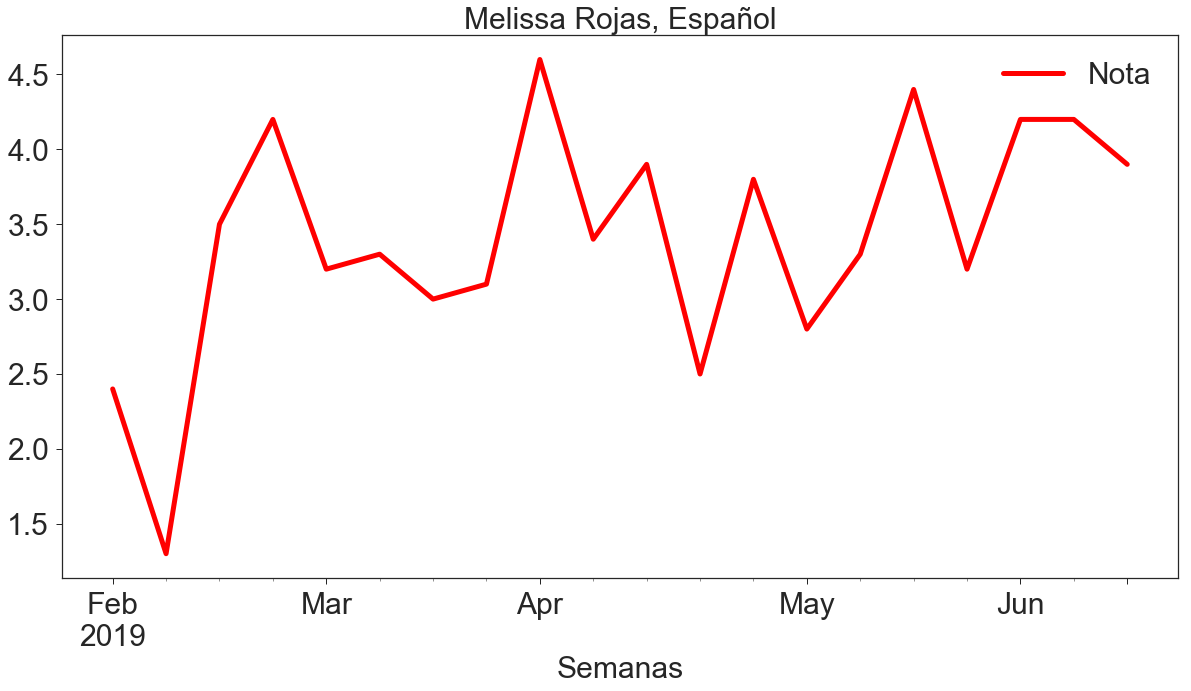

In [50]:
#aquí escogí h=100
fig=df_ts_All[100].plot(figsize=(20,10), linewidth=5, fontsize=30,color="r")
fig.set_facecolor('white')
plt.title(nombres[100]+', Español', fontsize=30)
plt.xlabel('Semanas', fontsize=30);
seaborn.set_style('ticks')
fig.legend(['Nota'],fontsize=30);
#plt.ylabel('Nota', fontsize=50);

## Gráfica de la serie para varios estudiantes (o todos)
- Basta modificar el limite derecho de la función range.
- Hasta 100 son los sextos, hasta 200 incluye sextos y sétimos, etc

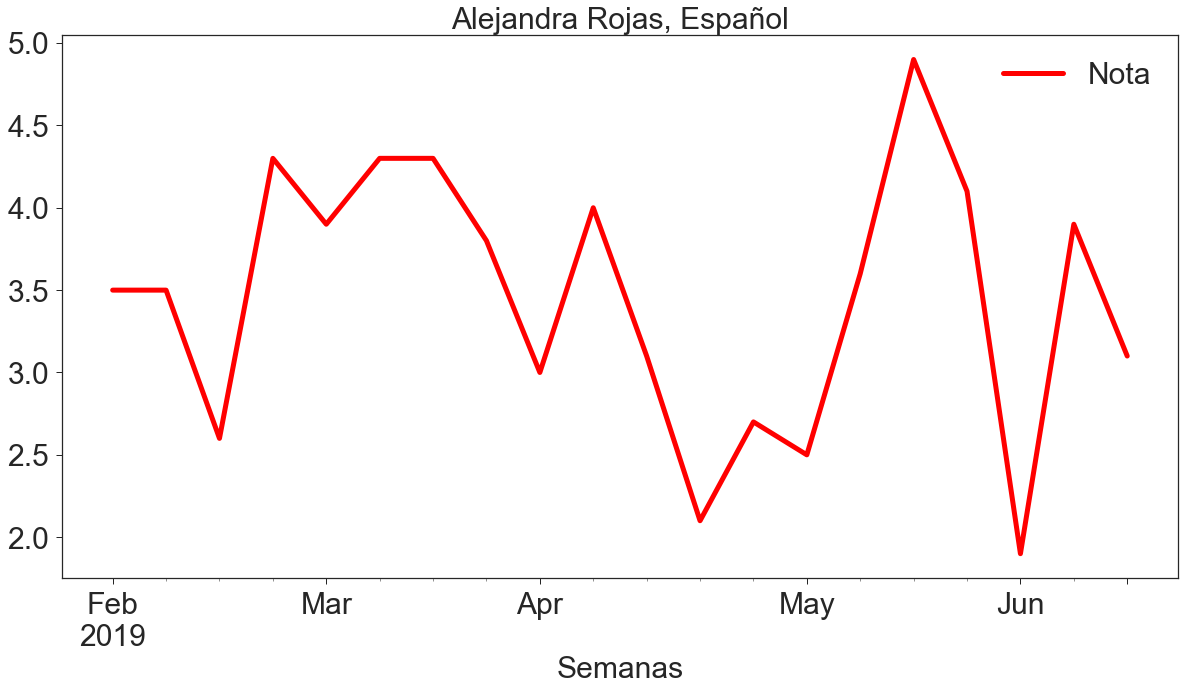

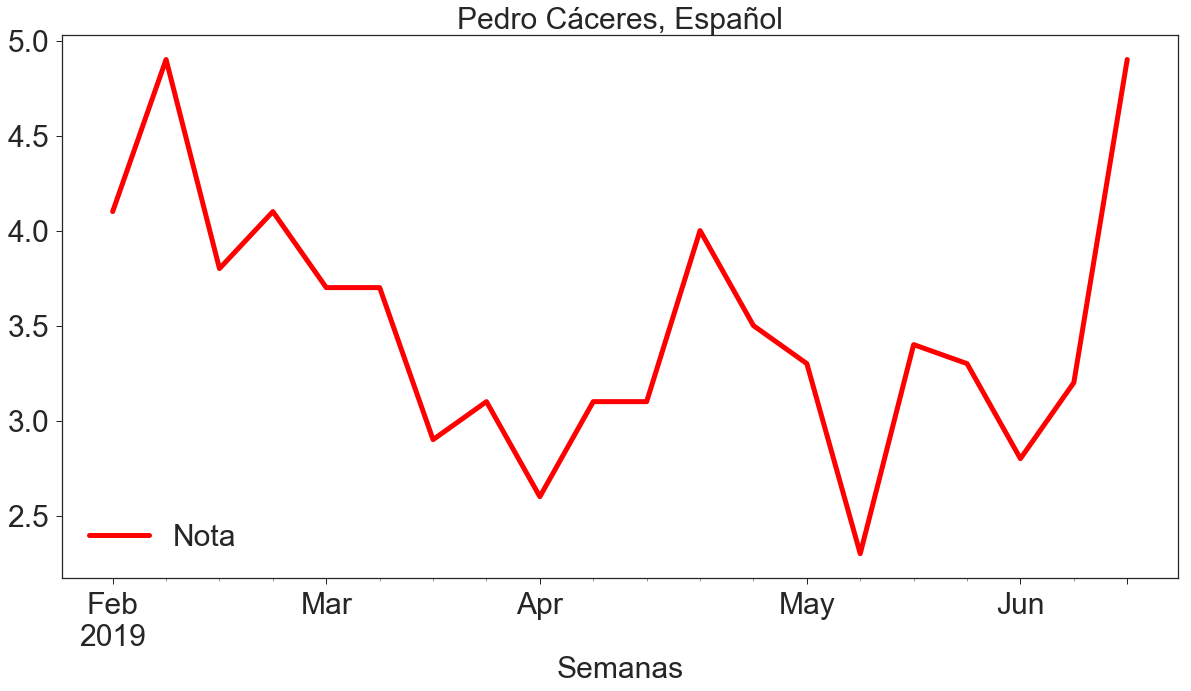

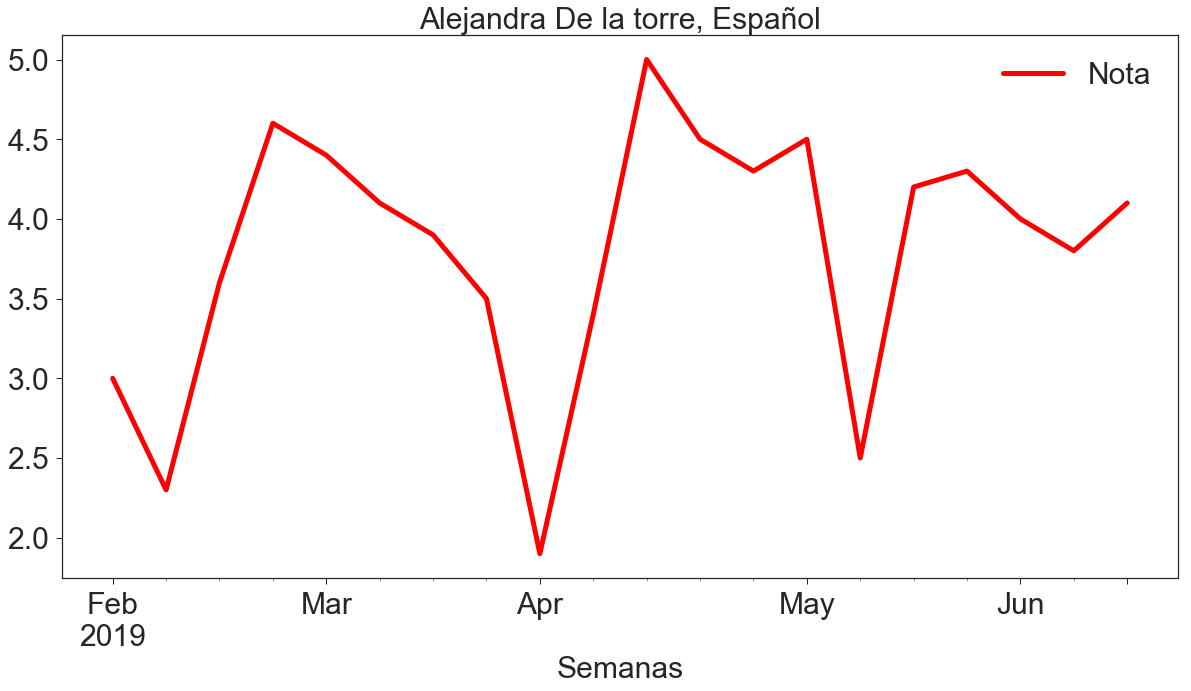

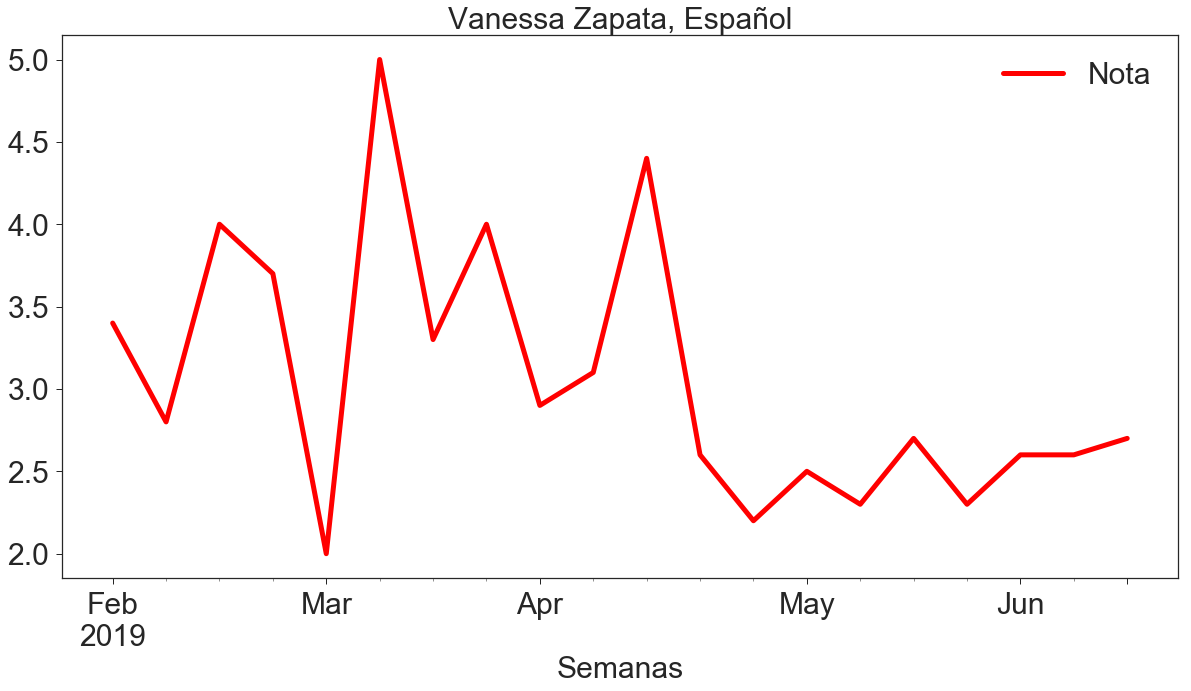

In [51]:
for h in range(0,4):
    fig=df_ts_All[h].plot(figsize=(20,10), linewidth=5, fontsize=30,color="r")
    fig.set_facecolor('white')
    plt.title(nombres[h]+', Español', fontsize=30)
    plt.xlabel('Semanas', fontsize=30);
    seaborn.set_style('ticks')
    fig.legend(['Nota'],fontsize=30);
    #plt.ylabel('Nota', fontsize=50);

## Gráfica de la serie para varios estudiantes (o todos) con la media de la materia
- Se incluye solo los sextos

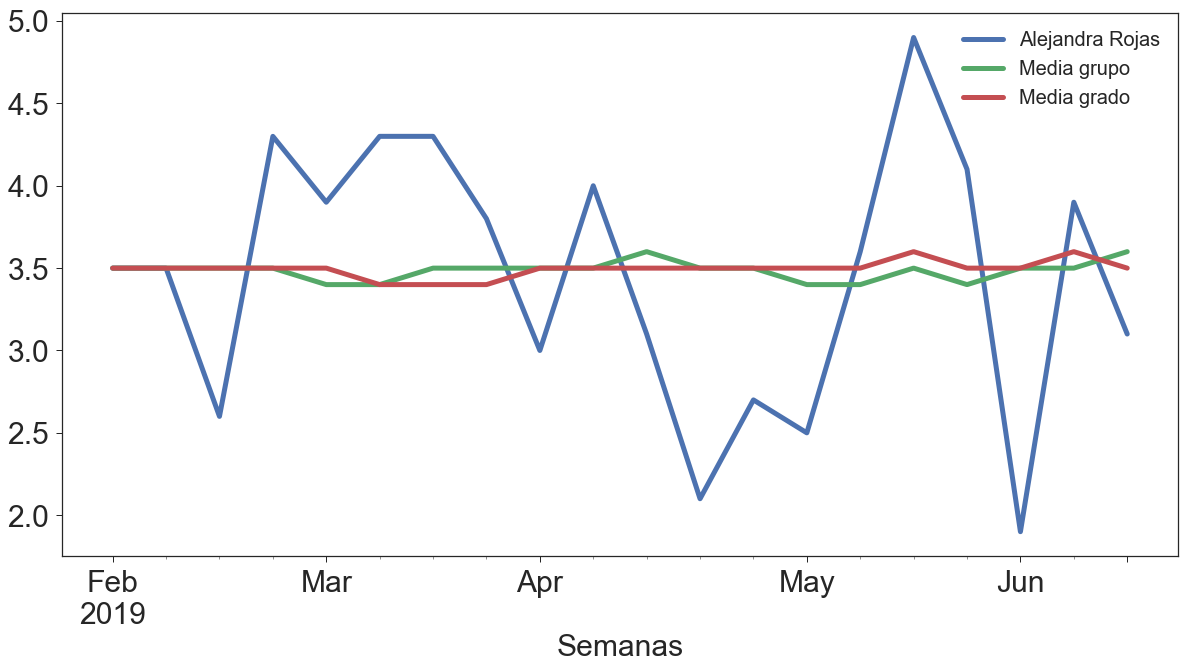

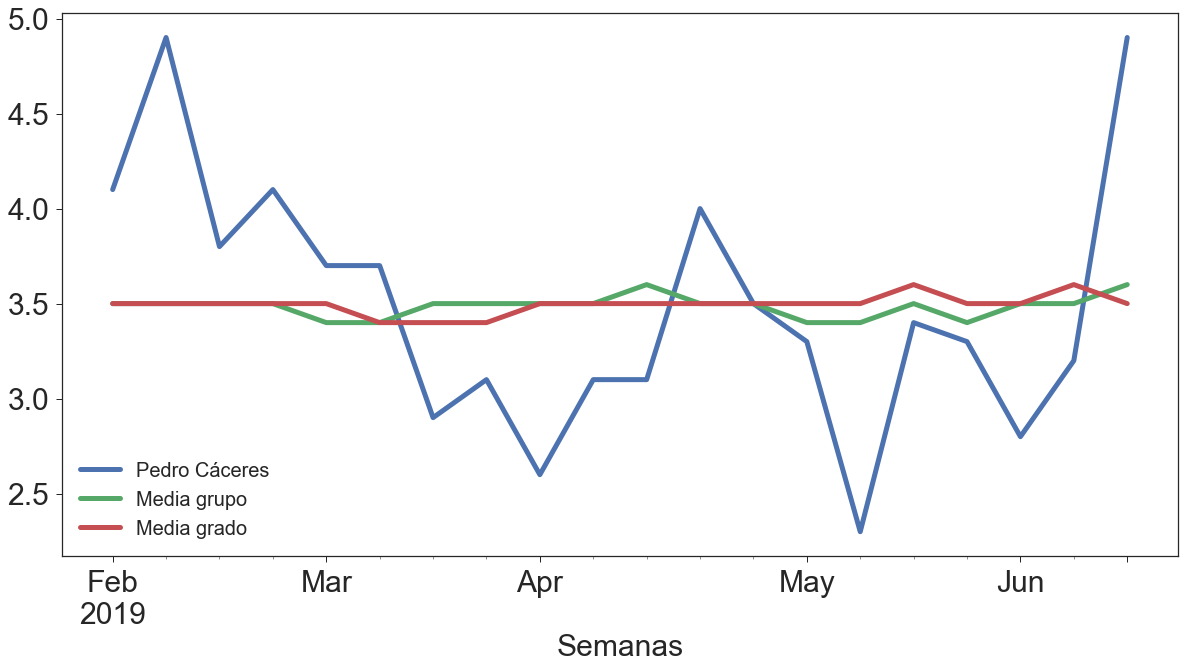

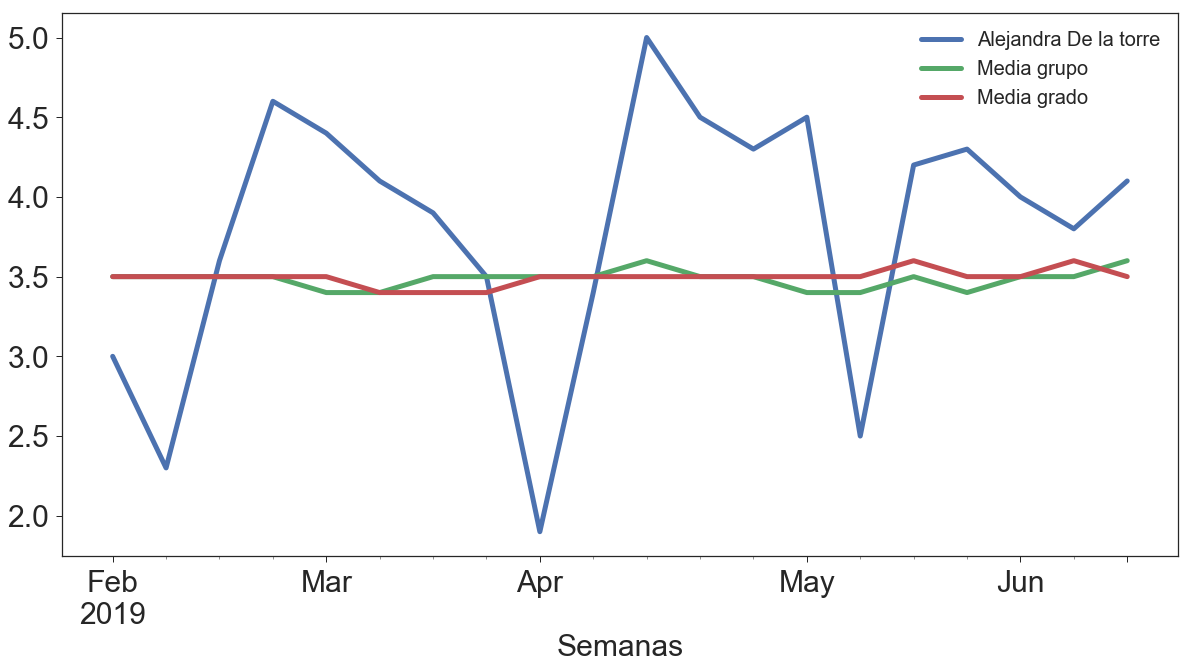

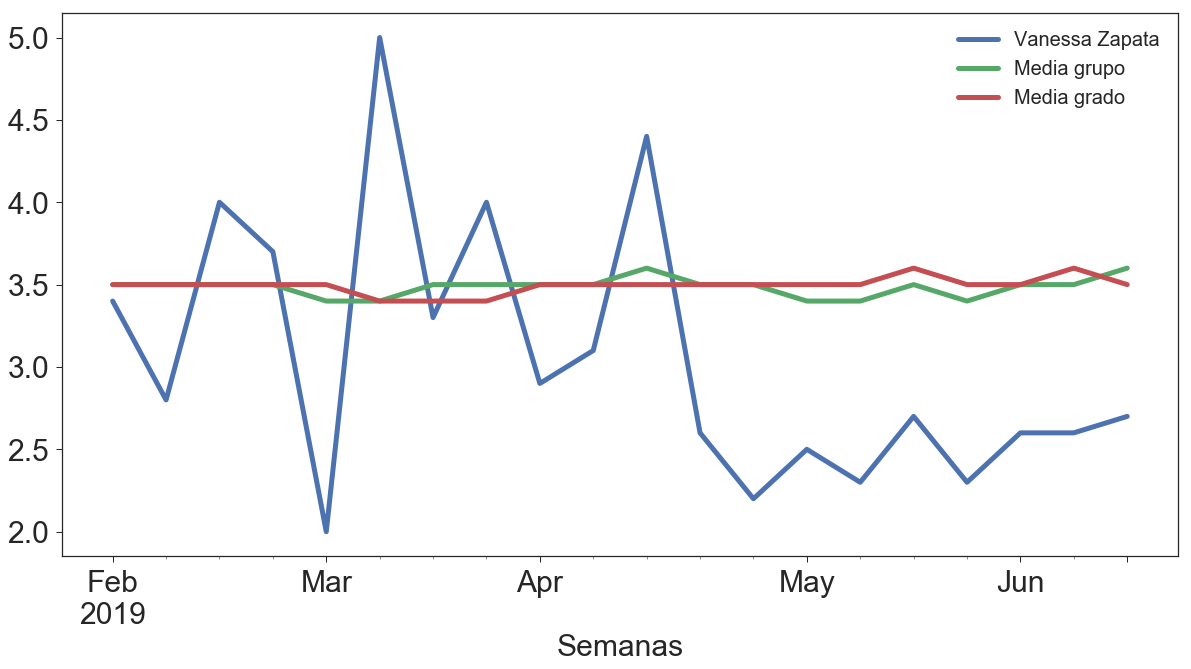

In [52]:
for h in range(0,4):
    ax = df_ts_All[h].plot(figsize=(20,10), linewidth=5, fontsize=30)
    fig1=df_sexto1.plot(figsize=(20,10), linewidth=5, fontsize=30,ax=ax);
    fig2=df_sexto.plot(figsize=(20,10), linewidth=5, fontsize=30,ax=ax);
    plt.xlabel('Semanas', fontsize=30);
    seaborn.set_style('ticks')
    ax.legend([nombres[h],'Media grupo','Media grado'],fontsize=20);
    plt.savefig('serie_de_tiempo_2.png')
    savefig('serie_de_tiempo_2.png', bbox_inches='tight')

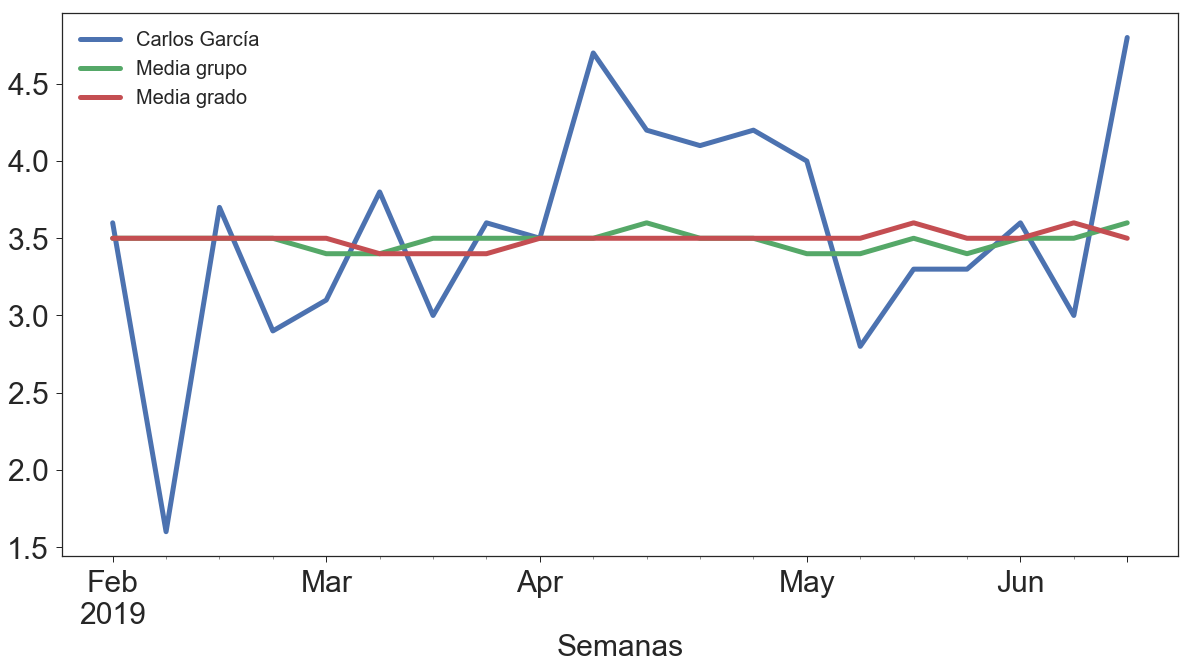

In [66]:
ax = df_ts_All[89].plot(figsize=(20,10), linewidth=5, fontsize=30)
fig1=df_sexto1.plot(figsize=(20,10), linewidth=5, fontsize=30,ax=ax);
fig2=df_sexto.plot(figsize=(20,10), linewidth=5, fontsize=30,ax=ax);
plt.xlabel('Semanas', fontsize=30);
seaborn.set_style('ticks')
ax.legend([nombres[89],'Media grupo','Media grado'],fontsize=20);
plt.savefig('serie_de_tiempo_6.png')
savefig('serie_de_tiempo_6.png', bbox_inches='tight')